In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern, Latin Modern Roman, Bitstream Vera Serif'
mpl.rcParams['text.usetex'] = True

In [2]:
def get_charge(df):
    idxs = df['index'].unique()
    charge = []
    for idx in idxs:
        charge.append(df[df['index'] == idx]['charge'][0])
    return np.array(charge)

In [3]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [4]:
BINS = 100
binning = np.linspace(0, 100, BINS+1)
bin_centres = (binning[:-1] + binning[1:])/2.

# Charge plots

## 06/15

In [5]:
store = pd.HDFStore("../data/l2/led/0615.hd5")
l_0615 = store['df']
store.close()

In [6]:
hist, _ = np.histogram(get_charge(l_0615), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 60., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 10, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0615 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0615 = (coeff[1] * 1e-9) / (pe_0615 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0615['index'].unique()))

Number of waveforms = 1822


/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


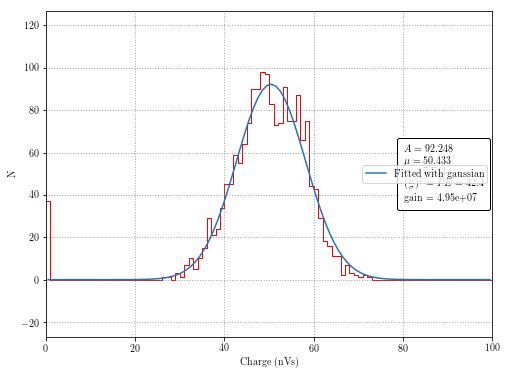

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0615) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0615),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/17

In [8]:
store = pd.HDFStore("../data/l2/led/0617.hd5")
l_0617 = store['df']
store.close()

In [9]:
hist, _ = np.histogram(get_charge(l_0617), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 10., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0617 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0617 = (coeff[1] * 1e-9) / (pe_0617 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0617['index'].unique()))

Number of waveforms = 937


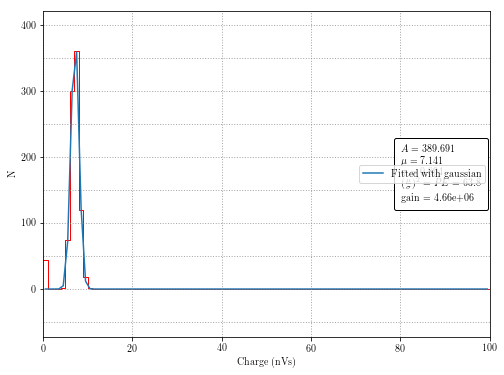

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0617) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0617),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/18

In [11]:
store = pd.HDFStore("../data/l2/led/0618.hd5")
l_0618 = store['df']
store.close()

In [12]:
hist, _ = np.histogram(get_charge(l_0618), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 10., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0618 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0618 = (coeff[1] * 1e-9) / (pe_0618 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0618['index'].unique()))

Number of waveforms = 927


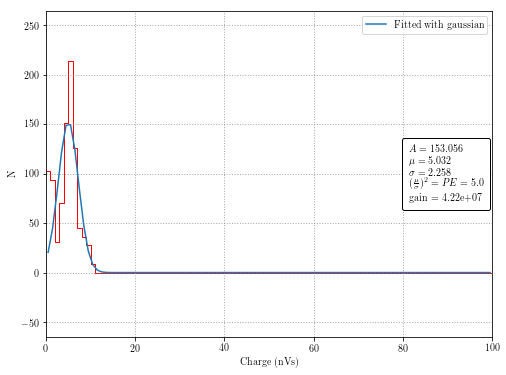

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0618) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0618),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/19

In [14]:
store = pd.HDFStore("../data/l2/led/0619.hd5")
l_0619 = store['df']
store.close()

In [15]:
hist, _ = np.histogram(get_charge(l_0619), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 10., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0619 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0619 = (coeff[1] * 1e-9) / (pe_0619 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0619['index'].unique()))

Number of waveforms = 927


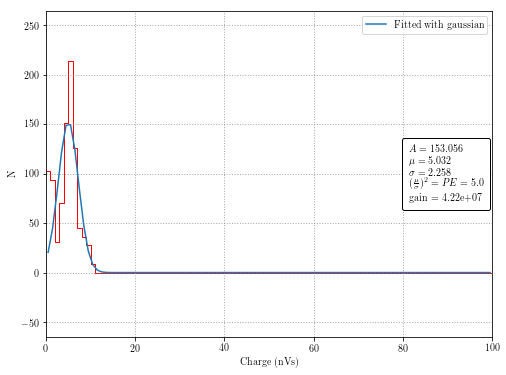

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0619) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0619),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/20

In [17]:
store = pd.HDFStore("../data/l2/led/0620.hd5")
l_0620 = store['df']
store.close()

In [18]:
BINS = 100
binning = np.linspace(0, 100, BINS+1)
bin_centres = (binning[:-1] + binning[1:])/2.

In [19]:
hist, _ = np.histogram(get_charge(l_0620), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0620 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0620 = (coeff[1] * 1e-9) / (pe_0620 * 150. * 1.6e-19)
#gain_0620 = (cum_gauss(*coeff) * 1e-9) / (pe_0620 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0620['index'].unique()))

Number of waveforms = 1444


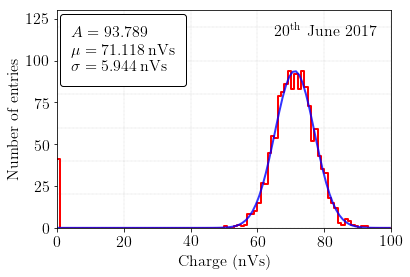

In [21]:
fontsize = 16

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)
ax.set_ylim(0, 130)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=2,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, linewidth=2, color='b', label='Fitted with gaussian', alpha=0.8)

ax.set_xlabel('Charge (nVs)', fontsize=fontsize)
ax.set_ylabel('Number of entries', fontsize=fontsize)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=1, linewidth=0.3)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=1, linewidth=0.3)

ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
    
#ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}'.format(coeff[1]) + r'\:{\rm nVs}$' +'\n' +
                  r'$\sigma = {0:.3f}'.format(abs(coeff[2])) + r'\:{\rm nVs}$',
                  prop=dict(size=fontsize), frameon=True, loc=2)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText(r'$20^{\rm th}\:\,{\rm June}\:\,2017$', prop=dict(size=fontsize), frameon=False, loc=1)
ax.add_artist(at)
fig.savefig('images/led_charge.eps', bbox_inches='tight', dpi=150)

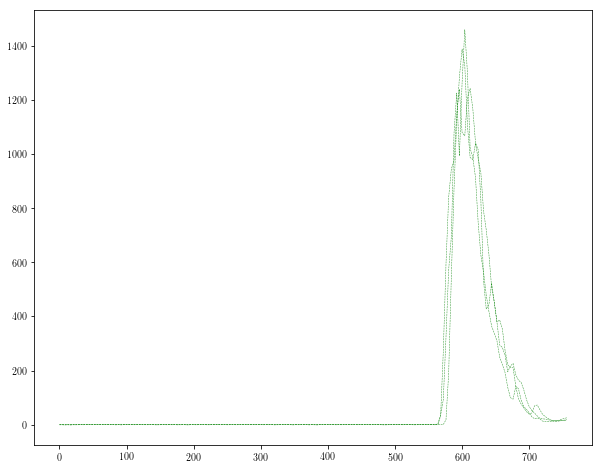

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

wv_idx = l_0620['index'].unique()
nplot = 100
for i, idx in enumerate(range(3)):
    if i == nplot: break
    wv_df = l_0620[l_0620['index'] == idx]
    ax.plot(wv_df['isamp'][:760/4], wv_df['voltage'][:760/4], linestyle='--', linewidth=0.5, alpha=0.8, c='green')

## 06/21

In [23]:
store = pd.HDFStore("../data/l2/led/0621.hd5")
l_0621 = store['df']
store.close()

In [24]:
hist, _ = np.histogram(get_charge(l_0621), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 60., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0621 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0621 = (coeff[1] * 1e-9) / (pe_0621 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0621['index'].unique()))

Number of waveforms = 2979


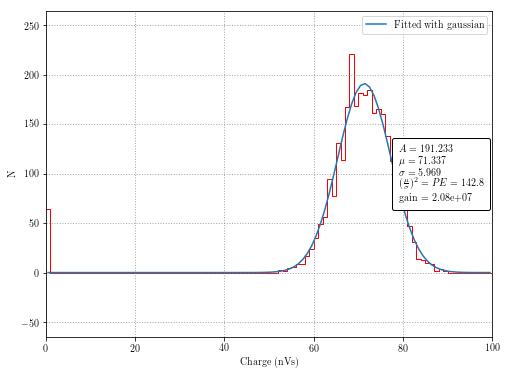

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0621) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0621),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/22

In [26]:
store = pd.HDFStore("../data/l2/led/0622.hd5")
l_0622 = store['df']
store.close()

In [27]:
hist, _ = np.histogram(get_charge(l_0622), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0622 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0622 = (coeff[1] * 1e-9) / (pe_0622 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0622['index'].unique()))

Number of waveforms = 2912


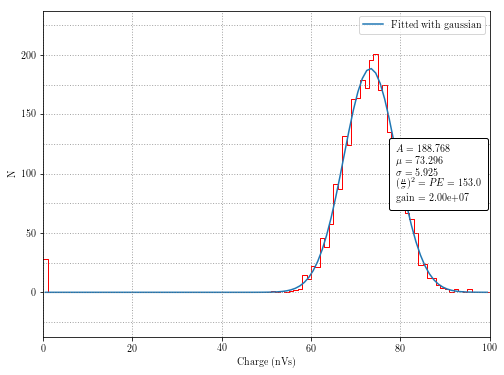

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0622) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0622),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/23

In [29]:
store = pd.HDFStore("../data/l2/led/0623.hd5")
l_0623 = store['df']
store.close()

In [30]:
hist, _ = np.histogram(get_charge(l_0623), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0623 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0623 = (coeff[1] * 1e-9) / (pe_0623 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0623['index'].unique()))

Number of waveforms = 1010


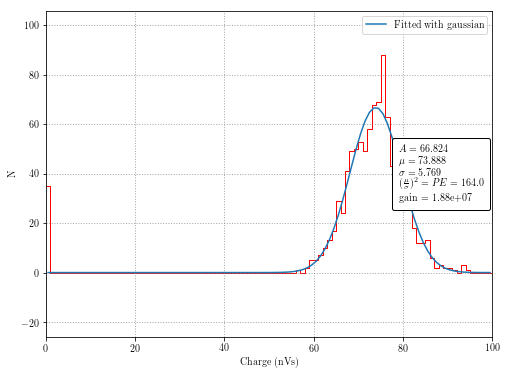

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0623) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0623),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/25

In [32]:
store = pd.HDFStore("../data/l2/led/0625.hd5")
l_0625 = store['df']
store.close()

In [33]:
hist, _ = np.histogram(get_charge(l_0625), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0625 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0625 = (coeff[1] * 1e-9) / (pe_0625 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0625['index'].unique()))

Number of waveforms = 1426


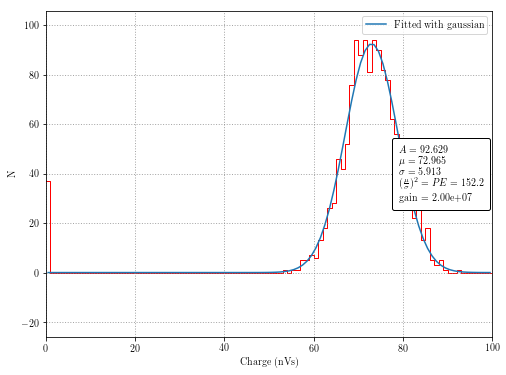

In [34]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0625) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0625),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/26

In [35]:
store = pd.HDFStore("../data/l2/led/0626.hd5")
l_0626 = store['df']
store.close()

In [36]:
hist, _ = np.histogram(get_charge(l_0626), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0626 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0626 = (coeff[1] * 1e-9) / (pe_0626 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0626['index'].unique()))

Number of waveforms = 1451


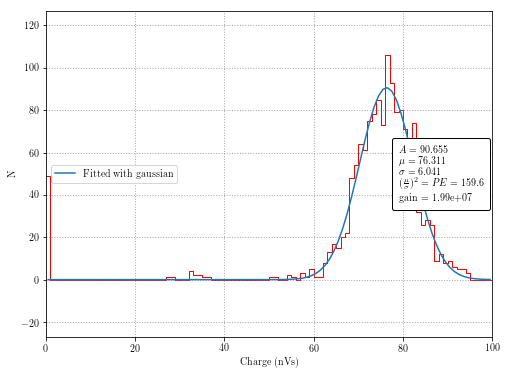

In [37]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0626) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0626),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/27

In [38]:
store = pd.HDFStore("../data/l2/led/0627.hd5")
l_0627 = store['df']
store.close()

In [39]:
hist, _ = np.histogram(get_charge(l_0627), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0627 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0627 = (coeff[1] * 1e-9) / (pe_0627 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0627['index'].unique()))

Number of waveforms = 1802


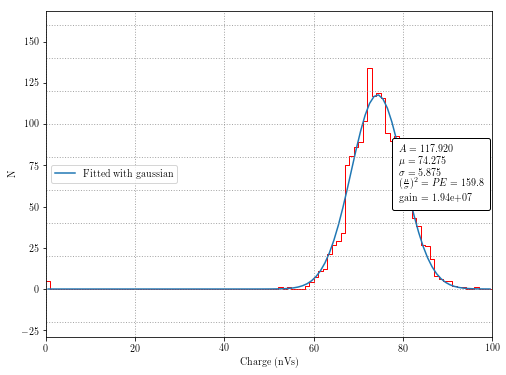

In [40]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0627) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0627),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/28

In [41]:
store = pd.HDFStore("../data/l2/led/0628.hd5")
l_0628 = store['df']
store.close()

In [42]:
hist, _ = np.histogram(get_charge(l_0628), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0628 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0628 = (coeff[1] * 1e-9) / (pe_0628 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0628['index'].unique()))

Number of waveforms = 1379


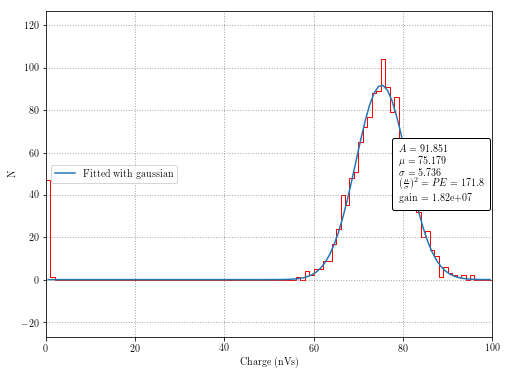

In [43]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0628) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0628),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

## 06/29

In [44]:
store = pd.HDFStore("../data/l2/led/0629.hd5")
l_0629 = store['df']
store.close()

In [45]:
hist, _ = np.histogram(get_charge(l_0629), binning)
hist_0 = np.concatenate([[hist[0]], hist])
# initial guess
p0 = [1., 70., 1.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0, bounds=([0, 5, 0], [1e6, 100, 100]))
hist_fit = gauss(bin_centres, *coeff)
pe_0629 = (coeff[1] / coeff[2])**2
# internal impedence of DDC2 is 150 ohms
gain_0629 = (coeff[1] * 1e-9) / (pe_0629 * 150. * 1.6e-19)
print 'Number of waveforms = {0}'.format(len(l_0629['index'].unique()))

Number of waveforms = 1754


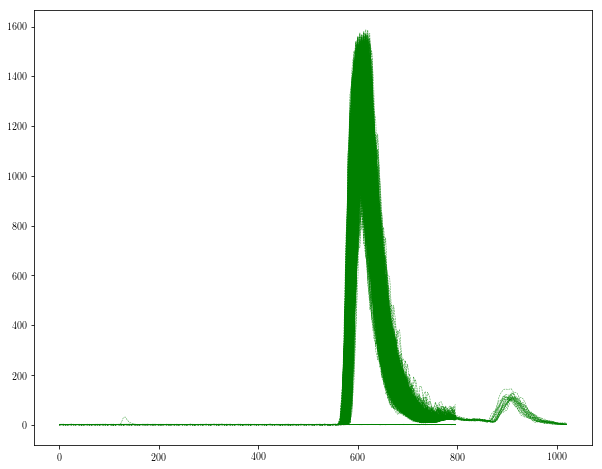

In [46]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

wv_idx = l_0629['index'].unique()
nplot = 10000
for i, idx in enumerate(wv_idx):
    if i == nplot: break
    wv_df = l_0629[l_0629['index'] == idx]
    ax.plot(wv_df['isamp'], wv_df['voltage'], linestyle='--', linewidth=0.5, alpha=0.8, c='green')

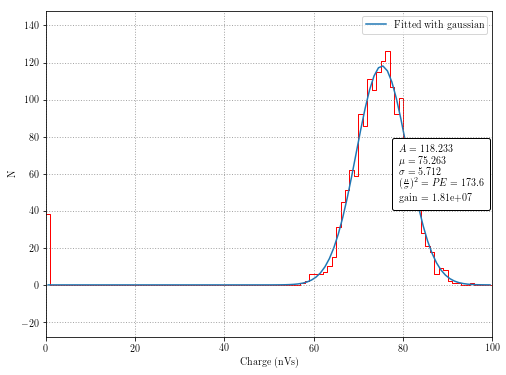

In [47]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0629) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0629),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

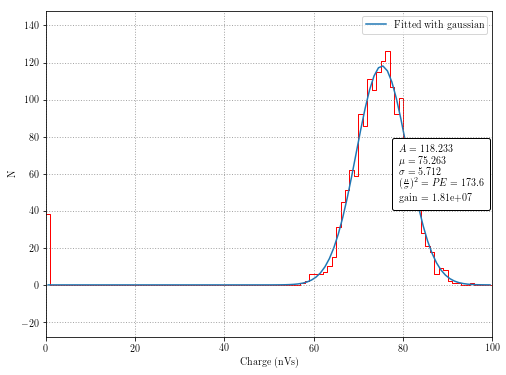

In [48]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlim(0, np.max(binning))
#ax.set_xlim(0, 20)

ax.step(
    binning, hist_0, alpha=1, drawstyle='steps-pre', linewidth=1,
    linestyle='-', color='r'
)
ax.plot(bin_centres, hist_fit, label='Fitted with gaussian')

ax.set_xlabel('Charge (nVs)')
ax.set_ylabel('N')
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.7, linewidth=1)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.7, linewidth=1)
    
ax.legend()
at = AnchoredText(r'$A = {0:.3f}$'.format(coeff[0]) + '\n' +
                  r'$\mu = {0:.3f}$'.format(coeff[1]) + '\n' +
                  r'$\sigma = {0:.3f}$'.format(abs(coeff[2])) + '\n' +
                  r'$(\frac{\mu}{\sigma})^2 = PE = ' + r'{0:.1f}$'.format(pe_0629) + '\n' +
                  r'gain = {0:.2e}'.format(gain_0629),
                  prop=dict(size=10), frameon=True, loc=5)
at.patch.set_boxstyle("round,pad=0.3,rounding_size=0.2")
ax.add_artist(at)

# Time Plots

In [49]:
gains = ma.masked_equal([gain_0615, gain_0617, gain_0618, gain_0619, gain_0620, \
         gain_0621, gain_0622, gain_0623, 0, gain_0625, gain_0626, gain_0627, gain_0628, gain_0629], 0)
pes = ma.masked_equal([pe_0615, pe_0617, pe_0618, pe_0619, pe_0620, \
       pe_0621, pe_0622, pe_0623, 0, pe_0625, pe_0626, pe_0627, pe_0628, pe_0629], 0)
day = []
for i in range(len(pes)):
    day.append(np.datetime64('2017-06-15') + np.timedelta64(i, 'D'))

In [50]:
a = day[-1]
print a
print a + np.timedelta64(12, 'h')
print np.datetime64('2017-06-28T00:00') + np.timedelta64(12, 'h')

2017-06-28
2017-06-28T12
2017-06-28T12:00


In [51]:
print gains[7]

18770821.59665892


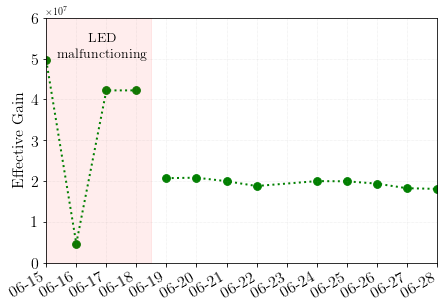

In [55]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(day[0:4], gains[0:4], linewidth=2, color='g', linestyle=':')
ax.plot(day[4:], gains[4:], linewidth=2, color='g', linestyle=':')
ax.plot([day[7], day[9]], [gains[7], gains[9]], linewidth=2, color='g', linestyle=':')
ax.scatter(day, gains, color='g', s=60)

ax.set_ylim(0, 6e7)
ax.set_xlim(day[0], day[-1])

ax.set_ylabel('Effective Gain', fontsize=fontsize)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.3, linewidth=0.5)
for xmaj in day:
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.3, linewidth=0.5)

dayL = mpl.dates.DayLocator()   # every day
daysFmt = mpl.dates.DateFormatter('%m-%d')

# format the ticks
ax.xaxis.set_major_locator(dayL)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(dayL)

ax.format_xdata = mpl.dates.DateFormatter('%m-%d')

ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

fb_1 = day[0:4]
fb_1[-1] += np.timedelta64(12, 'h')
ax.fill_between(fb_1, 0, 6e7, color='r', alpha=0.07)

ax.text(0.142, 0.885, 'LED\nmalfunctioning', fontsize=fontsize-2, horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes)
#ax.text(0.617, 0.6, 'Missing Datapoint', fontsize=fontsize, horizontalalignment='center',
#        verticalalignment='center', transform=ax.transAxes, rotation=-90)

fig.autofmt_xdate()

fig.savefig('images/gain.pdf', bbox_inches='tight', dpi=150)

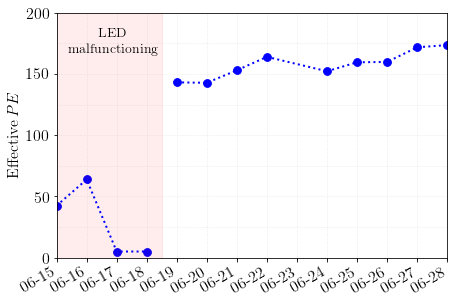

In [54]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(day[0:4], pes[0:4], linewidth=2, color='b', linestyle=':')
ax.plot(day[4:], pes[4:], linewidth=2, color='b', linestyle=':')
ax.plot([day[7], day[9]], [pes[7], pes[9]], linewidth=2, color='b', linestyle=':')
ax.scatter(day, pes, color='b', s=60)

ax.set_ylim(0, 200)
ax.set_xlim(day[0], day[-1])

ax.set_ylabel(r'${\rm Effective}\:PE$', fontsize=fontsize)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=0.3, linewidth=0.5)
for xmaj in day:
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=0.3, linewidth=0.5)

dayL = mpl.dates.DayLocator()   # every day
daysFmt = mpl.dates.DateFormatter('%m-%d')

# format the ticks
ax.xaxis.set_major_locator(dayL)
ax.xaxis.set_major_formatter(daysFmt)
ax.xaxis.set_minor_locator(dayL)

ax.format_xdata = mpl.dates.DateFormatter('%m-%d')

ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

fb_1 = day[0:4]
fb_1[-1] += np.timedelta64(12, 'h')
ax.fill_between(fb_1, 0, 6e7, color='r', alpha=0.07)

ax.text(0.142, 0.885, 'LED\nmalfunctioning', fontsize=fontsize-2, horizontalalignment='center',
        verticalalignment='center', transform=ax.transAxes)
#ax.text(0.617, 0.6, 'Missing Datapoint', fontsize=fontsize, horizontalalignment='center',
#        verticalalignment='center', transform=ax.transAxes, rotation=-90)

fig.autofmt_xdate()

fig.savefig('images/pes.pdf', bbox_inches='tight', dpi=150)